In [1]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Q1 Read the input file and check the data dimension

In [0]:
# You can access from https://www.kaggle.com/uciml/german-credit
#Read input file and understand the data
# "default" is my dependent variable

In [20]:
df=pd.read_csv("german_credit.csv")

df.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [7]:
df.shape

(1000, 21)

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
default,1000.0,0.300,0.458487,0.0,0.0,0.0,1.00,1.0
duration_in_month,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
credit_amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
installment_as_income_perc,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
present_res_since,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
credits_this_bank,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
people_under_maintenance,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0


In [21]:
df.info()

# No null values in the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
default                       1000 non-null int64
account_check_status          1000 non-null object
duration_in_month             1000 non-null int64
credit_history                1000 non-null object
purpose                       1000 non-null object
credit_amount                 1000 non-null int64
savings                       1000 non-null object
present_emp_since             1000 non-null object
installment_as_income_perc    1000 non-null int64
personal_status_sex           1000 non-null object
other_debtors                 1000 non-null object
present_res_since             1000 non-null int64
property                      1000 non-null object
age                           1000 non-null int64
other_installment_plans       1000 non-null object
housing                       1000 non-null object
credits_this_bank             1000 non-null int64
job                           1000

In [17]:
df['default'].value_counts()

# Data is biased towards '0'; 70% of the records are for '0'; this could be right as well as number of defaults would be low

0    700
1    300
Name: default, dtype: int64

In [0]:
# Lets build a Ensemble model but need to modify the dataset first


### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [30]:
df_model = pd.get_dummies(df)
df_model.head()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
0,0,6,1169,4,4,67,2,1,0,1,...,1,0,0,1,0,0,0,1,0,1
1,1,48,5951,2,2,22,1,1,1,0,...,1,0,0,1,0,0,1,0,0,1
2,0,12,2096,2,3,49,1,2,0,0,...,1,0,0,0,0,1,1,0,0,1
3,0,42,7882,2,4,45,1,2,0,1,...,0,0,0,1,0,0,1,0,0,1
4,1,24,4870,3,4,53,2,2,0,1,...,0,0,0,1,0,0,1,0,0,1


In [31]:
# Print Shape of model data
df_model.shape

(1000, 62)

### Check for highly correlated variables but don't required any treatment for this use case

In [56]:
cor = df_model.corr()
cor.sort_values(['default'], ascending=False)



,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
default,1.000000,0.214927,0.154739,0.072404,0.002967,-0.091127,-0.045732,-0.003015,0.119581,0.258333,...,-0.134589,0.092785,0.040559,-0.013559,0.005951,-2.182179e-02,0.036466,-0.036466,-0.082079,0.082079
account_check_status_< 0 DM,0.258333,0.022244,-0.020912,0.046917,0.088350,-0.011162,-0.029195,0.059041,-0.372670,1.000000,...,-0.125705,0.093310,-0.022427,-0.002879,-0.000428,2.354213e-02,0.067149,-0.067149,0.057751,-0.057751
duration_in_month,0.214927,1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,-0.023834,0.089452,0.022244,...,-0.075169,-0.064417,0.147515,0.055010,-0.044043,-1.812030e-01,-0.164718,0.164718,-0.138196,0.138196
savings_... < 100 DM,0.161007,-0.047228,-0.036443,-0.008626,-0.089921,-0.044084,0.033909,-0.019568,-0.047045,0.246438,...,0.000276,-0.010327,0.038885,-0.058800,-0.003706,3.781097e-02,0.060861,-0.060861,-0.003367,0.003367
credit_amount,0.154739,0.624984,1.000000,-0.271316,0.028926,0.032716,0.020795,0.017142,0.119612,-0.020912,...,-0.117497,-0.024611,0.319715,-0.092636,-0.027969,-1.617570e-01,-0.276995,0.276995,-0.050050,0.050050
credit_history_no credits taken/ all credits paid back duly,0.144767,0.118077,0.147191,-0.054401,0.000925,-0.022370,0.112427,0.011281,0.083318,0.023341,...,-0.039709,0.037805,-0.013221,0.029595,0.004175,-2.551552e-02,0.001664,-0.001664,0.014058,-0.014058
credit_history_all credits at this bank paid back duly,0.134448,0.033728,0.005923,0.030339,0.027694,0.014360,-0.095824,0.069185,0.019002,0.089054,...,-0.060799,0.014851,0.022804,-0.065917,0.060699,3.705968e-02,0.016955,-0.016955,-0.019952,0.019952
property_unknown / no property,0.125750,0.212838,0.248922,0.044990,0.188028,0.206368,-0.012850,0.077548,0.034825,0.048476,...,-0.476496,-0.069133,0.196672,-0.063236,0.049334,-1.163600e-01,-0.139930,0.139930,-0.054276,0.054276
account_check_status_0 <= ... < 200 DM,0.119581,0.089452,0.119612,-0.051906,-0.055817,-0.078121,-0.052662,-0.066643,1.000000,-0.372670,...,0.001012,-0.000888,0.051999,-0.067587,0.047382,1.804077e-02,-0.015276,0.015276,-0.059172,0.059172
present_emp_since_... < 1 year,0.106397,-0.056792,-0.051502,-0.034021,-0.164155,-0.209967,-0.096399,-0.048764,0.082058,0.011122,...,-0.021299,0.112062,-0.070563,-0.007464,0.021967,6.359630e-02,0.072837,-0.072837,0.037004,-0.037004


In [59]:
abs(cor.sort_values(['default'], ascending=False)) > 0.5
# If we consider atleast 0.5 as high correlation

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
default,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
account_check_status_< 0 DM,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
duration_in_month,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
savings_... < 100 DM,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
credit_amount,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
credit_history_no credits taken/ all credits paid back duly,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
credit_history_all credits at this bank paid back duly,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
property_unknown / no property,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
account_check_status_0 <= ... < 200 DM,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
present_emp_since_... < 1 year,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


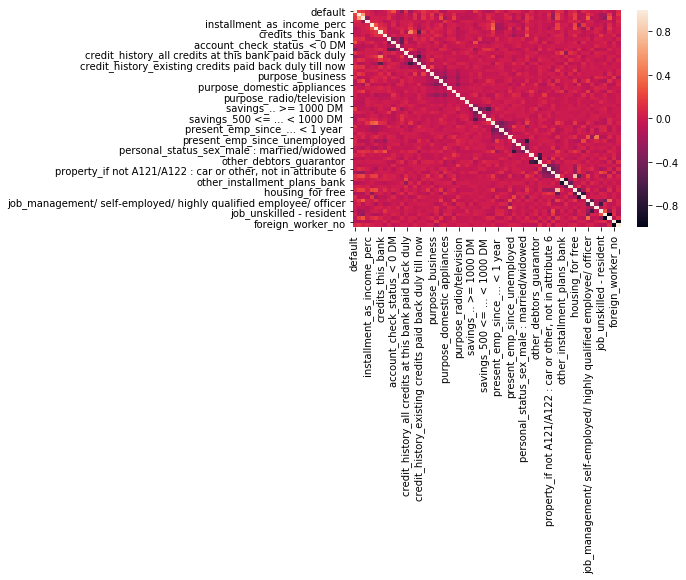

In [53]:
sns.heatmap(df_model.corr())

### Drop the original variables which are converted to dummy

In [60]:
orig_object_cols = list(df.select_dtypes(include=['object']).columns)
orig_object_cols


['account_check_status',
 'credit_history',
 'purpose',
 'savings',
 'present_emp_since',
 'personal_status_sex',
 'other_debtors',
 'property',
 'other_installment_plans',
 'housing',
 'job',
 'telephone',
 'foreign_worker']

In [62]:
df_model.columns

# original columns that were converted to dummy are not present in the dataframe df_model

Index(['default', 'duration_in_month', 'credit_amount',
       'installment_as_income_perc', 'present_res_since', 'age',
       'credits_this_bank', 'people_under_maintenance',
       'account_check_status_0 <= ... < 200 DM', 'account_check_status_< 0 DM',
       'account_check_status_>= 200 DM / salary assignments for at least 1 year',
       'account_check_status_no checking account',
       'credit_history_all credits at this bank paid back duly',
       'credit_history_critical account/ other credits existing (not at this bank)',
       'credit_history_delay in paying off in the past',
       'credit_history_existing credits paid back duly till now',
       'credit_history_no credits taken/ all credits paid back duly',
       'purpose_(vacation - does not exist?)', 'purpose_business',
       'purpose_car (new)', 'purpose_car (used)',
       'purpose_domestic appliances', 'purpose_education',
       'purpose_furniture/equipment', 'purpose_radio/television',
       'purpose_repairs',

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [64]:
from sklearn.model_selection import train_test_split

X = df_model.drop(['default'], axis=1)
y = df_model['default']

print (X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

print ('X train', X_train.shape)
print ('X test', X_test.shape)
print ('y train', y_train.shape)
print ('y test', y_test.shape)

print (y.value_counts())
print (y_train.value_counts())
print (y_test.value_counts())

(1000, 61)
X train (700, 61)
X test (300, 61)
y train (700,)
y test (300,)
0    700
1    300
Name: default, dtype: int64
0    486
1    214
Name: default, dtype: int64
0    214
1     86
Name: default, dtype: int64


### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [67]:
from sklearn.ensemble import RandomForestClassifier 

rfcl = RandomForestClassifier(n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999).fit(X_train, y_train)
rfcl = rfcl.fit(X_train,y_train)

y_predict_rf = rfcl.predict(X_test)
rfcl

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
            oob_score=False, random_state=9999, verbose=0,
            warm_start=False)

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [68]:
from sklearn import metrics

print("Accuracy Score")
print (rfcl.score(X_test, y_test))
print("Confusion matrix ")
print(metrics.confusion_matrix(y_test, y_predict_rf))


Accuracy Score
0.76
Confusion matrix 
[[190  24]
 [ 48  38]]


### Q6 Show the list of the features importance( 1 Marks)

In [73]:
for feature in zip(X.columns, rfcl.feature_importances_):
    print(feature)

('duration_in_month', 0.07715516760780634)
('credit_amount', 0.10084406686989868)
('installment_as_income_perc', 0.03380165486687423)
('present_res_since', 0.034184517102204735)
('age', 0.07570705316609905)
('credits_this_bank', 0.019288142678178175)
('people_under_maintenance', 0.013337989526179242)
('account_check_status_0 <= ... < 200 DM', 0.016158503650349168)
('account_check_status_< 0 DM', 0.03431930037438658)
('account_check_status_>= 200 DM / salary assignments for at least 1 year', 0.009223111025497917)
('account_check_status_no checking account', 0.048111075638702996)
('credit_history_all credits at this bank paid back duly', 0.01223125216184599)
('credit_history_critical account/ other credits existing (not at this bank)', 0.019579015697533918)
('credit_history_delay in paying off in the past', 0.010523720980243758)
('credit_history_existing credits paid back duly till now', 0.013571385298694831)
('credit_history_no credits taken/ all credits paid back duly', 0.0131110982813

### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [83]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import model_selection

In [76]:
# Use below values
num_folds = 10
seed = 77

In [0]:
#Validate the Random Forest model build above using k fold

In [85]:
kfold = model_selection.KFold(n_splits=num_folds, random_state=seed)
results = model_selection.cross_val_score(rfcl, X, y, cv=kfold)

print(results)


[0.86 0.71 0.76 0.79 0.8  0.67 0.74 0.8  0.76 0.76]


In [0]:
#Calculate Mean score

In [86]:
print("Mean is :",results.mean()*100)

Mean is : 76.5


In [0]:
# Calculate score standard deviation using std()

In [87]:
print("Standard Deviation:", results.std()*100.0)

Standard Deviation: 4.984977432245808


# Q8 Print the confusion matrix( 1 Marks)

In [90]:
print("Confusion matrix ")
arrConf=metrics.confusion_matrix(y_test, rfcl.predict(X_test))
print(arrConf)

Confusion matrix 
[[190  24]
 [ 48  38]]


# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [91]:
print("Sensitivity is ",arrConf[0,0]/(arrConf[0,0]+arrConf[0,1]))
print("Precision is :",arrConf[0,0]/(arrConf[0,0]+arrConf[1,0]))

Sensitivity is  0.8878504672897196
Precision is : 0.7983193277310925


In [94]:
from sklearn.metrics import classification_report
print(classification_report(y_test,rfcl.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       214
           1       0.61      0.44      0.51        86

   micro avg       0.76      0.76      0.76       300
   macro avg       0.71      0.66      0.68       300
weighted avg       0.75      0.76      0.75       300



# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [0]:
#Hint: Use roc_curve

In [96]:
from sklearn.metrics import classification_report,roc_curve, roc_auc_score, auc

def get_roc (y_test,y_pred):
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    #Plot of a ROC curve
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="upper left")
    plt.show()
    return

RandomForestClassifier
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False) 



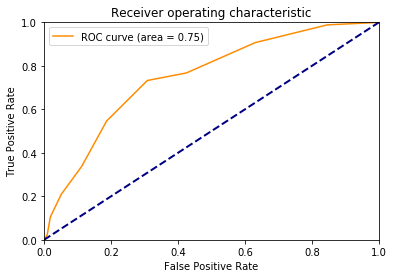

In [97]:
from sklearn.ensemble import RandomForestClassifier 

def randomforestclf(X_train, y_train,X_test, y_test):
    print("RandomForestClassifier")
    randomforest = RandomForestClassifier().fit(X_train, y_train)
    print(randomforest,'\n')
    
    # Predict target variables y for test data
    y_pred = randomforest.predict_proba(X_test)[:,1]
    get_roc (y_test,y_pred)
    return

randomforestclf(X_train, y_train,X_test, y_test)

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

In [108]:
roc_auc_score(y_test, y_pred)

0.675396652901543

### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [104]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [105]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    rfcl.fit(X_, y_)
    y_pred = rfcl.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

In [106]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.7796666666666667
Standard deviation:  0.01345362404707371
